In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('IBM Attrition Data.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
df.shape

(1470, 13)

In [15]:
df.isna().any()
#Mean and Median imputation from sklearn and can be only used for numerical data

Age                        False
Attrition                  False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EnvironmentSatisfaction    False
JobSatisfaction            False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
WorkLifeBalance            False
YearsAtCompany             False
dtype: bool

In [5]:
df['Education'].dtype

dtype('int64')

In [6]:
df.iloc[0:3, 4:8]

,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction
0,2,Life Sciences,2,4
1,1,Life Sciences,3,2
2,2,Other,4,3


In [7]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [8]:
df['Department'].values

array(['Sales', 'Research & Development', 'Research & Development', ...,
       'Research & Development', 'Sales', 'Research & Development'],
      dtype=object)

In [9]:
df.mean()

C:\Users\91990\AppData\Local\Temp/ipykernel_21884/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Age                          36.923810
DistanceFromHome              9.192517
Education                     2.912925
EnvironmentSatisfaction       2.721769
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
WorkLifeBalance               2.761224
YearsAtCompany                7.008163
dtype: float64

In [10]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [11]:
df.mode(axis = 0)
#Use boxplot from seaborn to find outliers and clean data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,35,No,Research & Development,2,3,Life Sciences,3,4,Married,2342,1,3,5


<AxesSubplot:xlabel='Age', ylabel='count'>

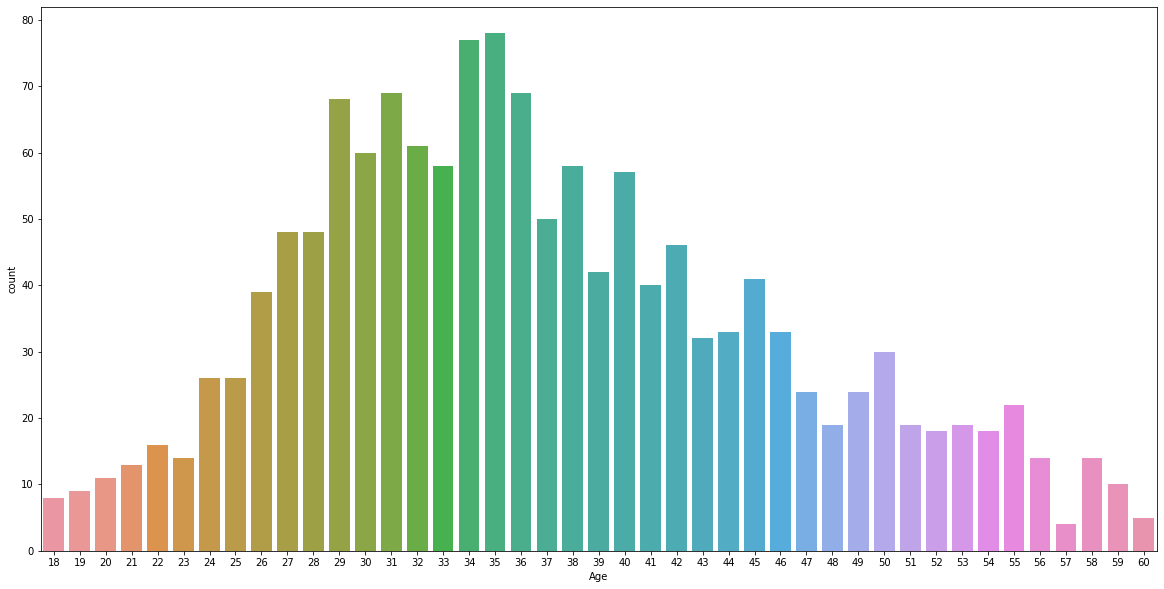

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(x = 'Age', data = df, ax = ax)

(array([ 17.,  11.,  13.,  16.,  14.,  26.,  26.,  39.,  48.,  48.,  68.,
         60.,  69., 119.,  77.,  78.,  69.,  50.,  58.,  42.,  57.,  40.,
         46.,  32.,  33.,  41.,  57.,  19.,  24.,  30.,  19.,  18.,  19.,
         18.,  22.,  14.,   4.,  14.,  15.]),
 array([18.        , 19.07692308, 20.15384615, 21.23076923, 22.30769231,
        23.38461538, 24.46153846, 25.53846154, 26.61538462, 27.69230769,
        28.76923077, 29.84615385, 30.92307692, 32.        , 33.07692308,
        34.15384615, 35.23076923, 36.30769231, 37.38461538, 38.46153846,
        39.53846154, 40.61538462, 41.69230769, 42.76923077, 43.84615385,
        44.92307692, 46.        , 47.07692308, 48.15384615, 49.23076923,
        50.30769231, 51.38461538, 52.46153846, 53.53846154, 54.61538462,
        55.69230769, 56.76923077, 57.84615385, 58.92307692, 60.        ]),
 <BarContainer object of 39 artists>)

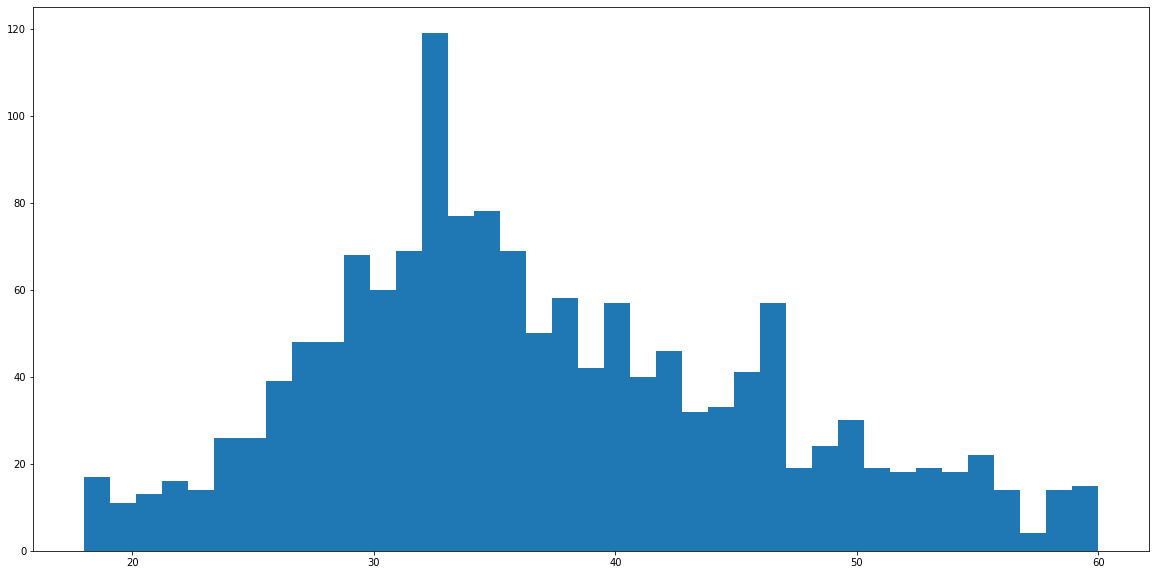

In [21]:
plt.figure(figsize=(20,10))
plt.hist(df['Age'], bins = 39)

In [13]:
replace_values = {'Yes' : 1, 'No' : 0}
att_num_df = df.replace({'Attrition':replace_values})
att_num_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
#Pivot Method
def function(arg):
    code
    code
dataframe['column'] = dataframe['column'].apply(function)

<AxesSubplot:xlabel='Age', ylabel='count'>

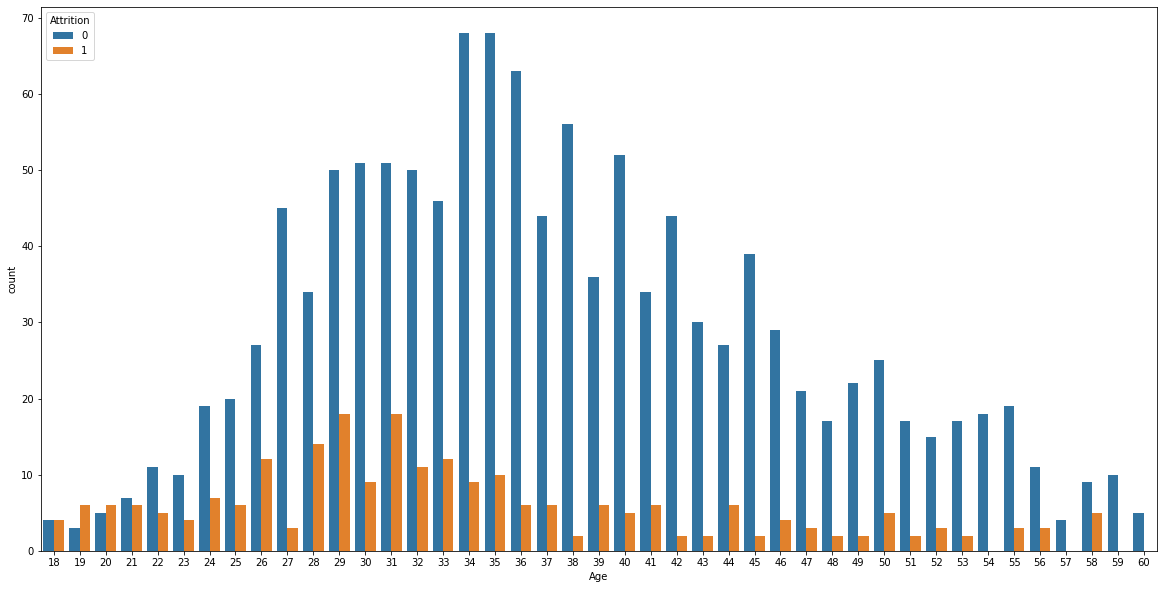

In [14]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(x = 'Age', hue = 'Attrition', data = att_num_df, ax = ax)

([<matplotlib.patches.Wedge at 0x23b0717d370>,
 [Text(0.8436554316905018, 0.7058650810028168, 'Young'),
  Text(-1.0962545613571792, 0.4880839443206245, 'Middle'),
  Text(0.09391965276556648, -1.095983165392788, 'Old Middle'),
  Text(1.0256695251373378, -0.39749468575636104, 'Old')])

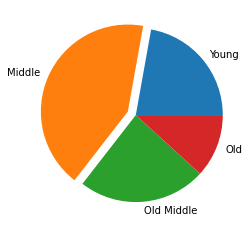

In [36]:
%matplotlib inline
def r_age(num):
    if num >= 18 and num < 30:
        return 'Young'
    elif num >= 30 and num < 40:
        return 'Middle'
    elif num >= 40 and num < 50:
        return 'Old Middle'
    else:
        return 'Old'
df['Age_Range'] = df['Age'].apply(r_age)
df_ex = df.groupby(['Age_Range'])
val = np.array([326, 622, 349, 173])
label = ['Young', 'Middle', 'Old Middle', 'Old']
exp = [0, 0.1, 0, 0]
plt.pie(val, labels = label, explode = exp)

In [38]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

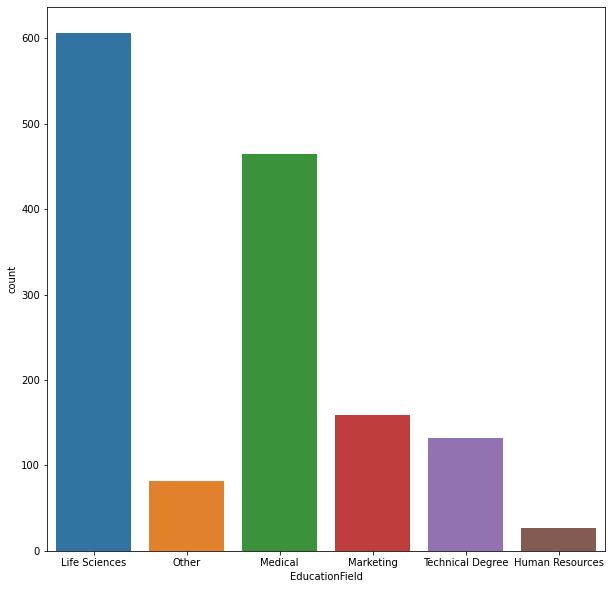

In [41]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = 'EducationField', data = df, ax = ax)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

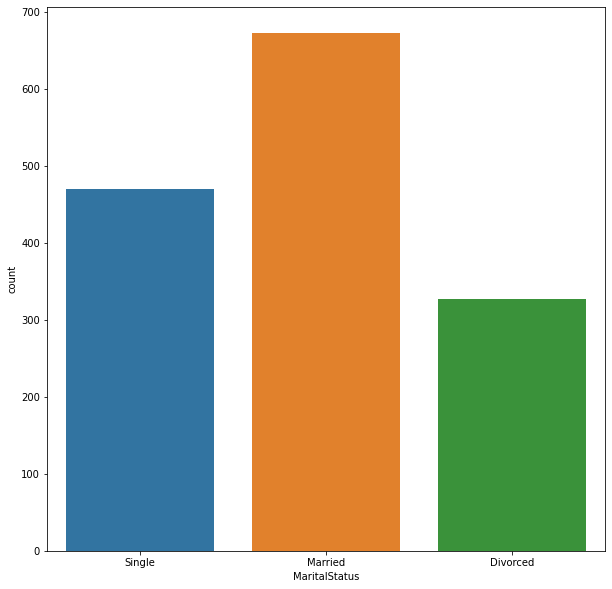

In [44]:
fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x = 'MaritalStatus', data = df, ax =ax)